In [1]:
# Import Data Malipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualisatiobn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Loginggs Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s',)


# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBClassifier

# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [2]:
url = "https://raw.githubusercontent.com/Arbajshaikh7030/Online_Shoppers_Purchasing_Intention/refs/heads/main/online_shoppers_intention.csv"

df = pd.read_csv(url)

df.sample(frac=1)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4037,5,52.500000,0,0.0,24,1365.500000,0.002778,0.030000,0.000000,0.0,May,2,7,7,4,Returning_Visitor,True,False
7304,2,13.100000,0,0.0,62,5556.932698,0.000000,0.020625,4.964521,0.0,Sep,2,2,3,2,Returning_Visitor,True,False
8445,0,0.000000,0,0.0,97,2300.891317,0.000000,0.015730,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,False
10407,2,14.000000,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
8484,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,Dec,2,2,1,13,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,3,42.000000,0,0.0,16,1266.500000,0.000000,0.003509,0.000000,0.0,Mar,2,2,6,1,Returning_Visitor,False,False
10872,0,0.000000,0,0.0,15,803.333333,0.000000,0.038889,0.000000,0.0,Dec,4,1,1,2,Returning_Visitor,False,False
11845,12,246.252381,2,56.5,102,4264.419078,0.007784,0.019834,0.000000,0.0,Nov,3,2,1,10,Returning_Visitor,True,False
9280,3,115.500000,0,0.0,55,1833.244643,0.000000,0.008286,18.616843,0.0,Nov,2,2,6,2,Returning_Visitor,True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.duplicated().sum()

125

In [6]:
# Removing duplicate rows

df.drop_duplicates()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [7]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Month'] = le.fit_transform(df['Month'])

In [8]:
from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode(),
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,Administrative,0.0,27.000000,2.315166,"0 0 Name: Administrative, dtype: int64",0.000000,4.000000,4.000000,3.321784,1.960357,4.701146,Has Outliers
1,Administrative_Duration,0.0,3398.750000,80.818611,"0 0.0 Name: Administrative_Duration, dtype:...",0.000000,93.256250,93.256250,176.779107,5.615719,50.556739,Has Outliers
2,Informational,0.0,24.000000,0.503569,"0 0 Name: Informational, dtype: int64",0.000000,0.000000,0.000000,1.270156,4.036464,26.932266,Has Outliers
3,Informational_Duration,0.0,2549.375000,34.472398,"0 0.0 Name: Informational_Duration, dtype: ...",0.000000,0.000000,0.000000,140.749294,7.579185,76.316853,Has Outliers
4,ProductRelated,0.0,705.000000,31.731468,"0 1 Name: ProductRelated, dtype: int64",7.000000,38.000000,31.000000,44.475503,4.341516,31.211707,Has Outliers
5,ProductRelated_Duration,0.0,63973.522230,1194.746220,"0 0.0 Name: ProductRelated_Duration, dtype:...",184.137500,1464.157214,1280.019714,1913.669288,7.263228,137.174164,Has Outliers
6,BounceRates,0.0,0.200000,0.022191,"0 0.0 Name: BounceRates, dtype: float64",0.000000,0.016813,0.016813,0.048488,2.947855,7.723159,Has Outliers
7,ExitRates,0.0,0.200000,0.043073,"0 0.2 Name: ExitRates, dtype: float64",0.014286,0.050000,0.035714,0.048597,2.148789,4.017035,Has Outliers
8,PageValues,0.0,361.763742,5.889258,"0 0.0 Name: PageValues, dtype: float64",0.000000,0.000000,0.000000,18.568437,6.382964,65.635694,Has Outliers
9,SpecialDay,0.0,1.000000,0.061427,"0 0.0 Name: SpecialDay, dtype: float64",0.000000,0.000000,0.000000,0.198917,3.302667,9.913659,Has Outliers


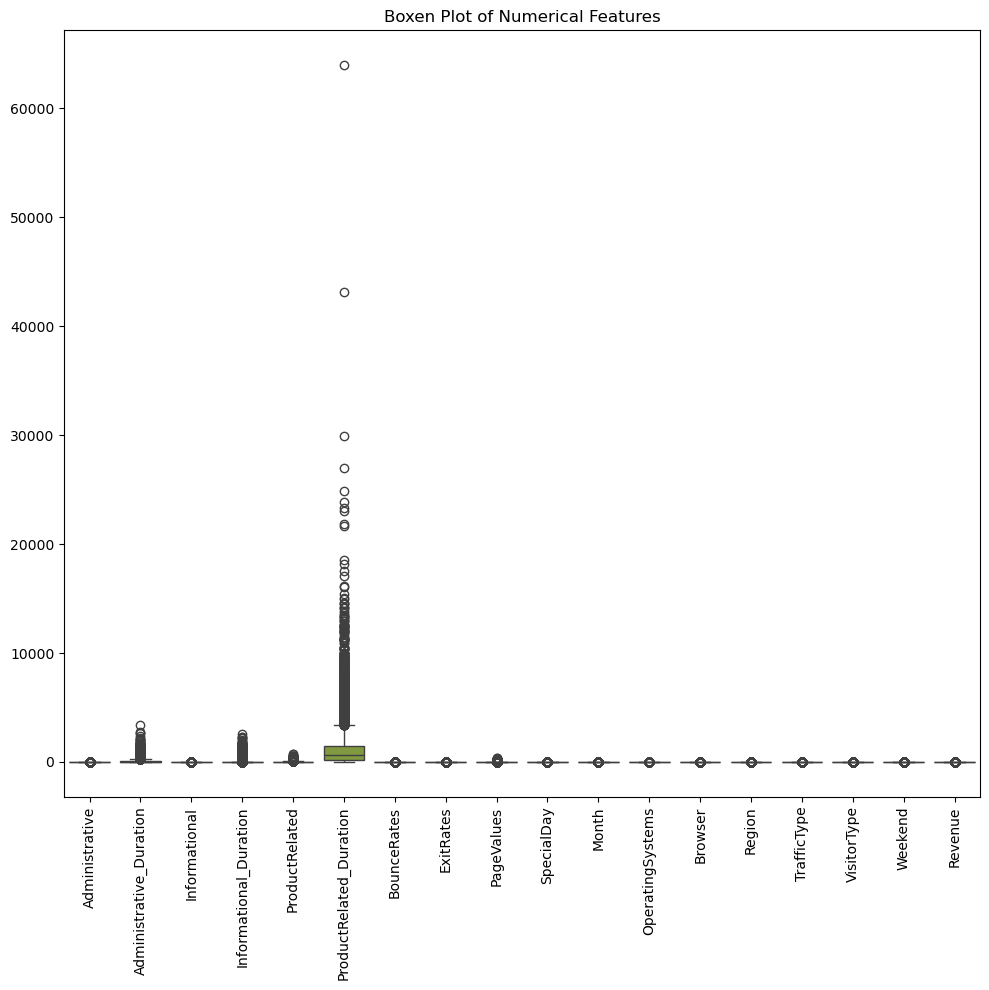

In [9]:
# Checking Outliers Using BoxPlot
plt.figure(figsize=(10, 10))
sns.boxplot(data= df)

plt.xticks(rotation = 90)
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()

In [10]:
df['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

<Axes: >

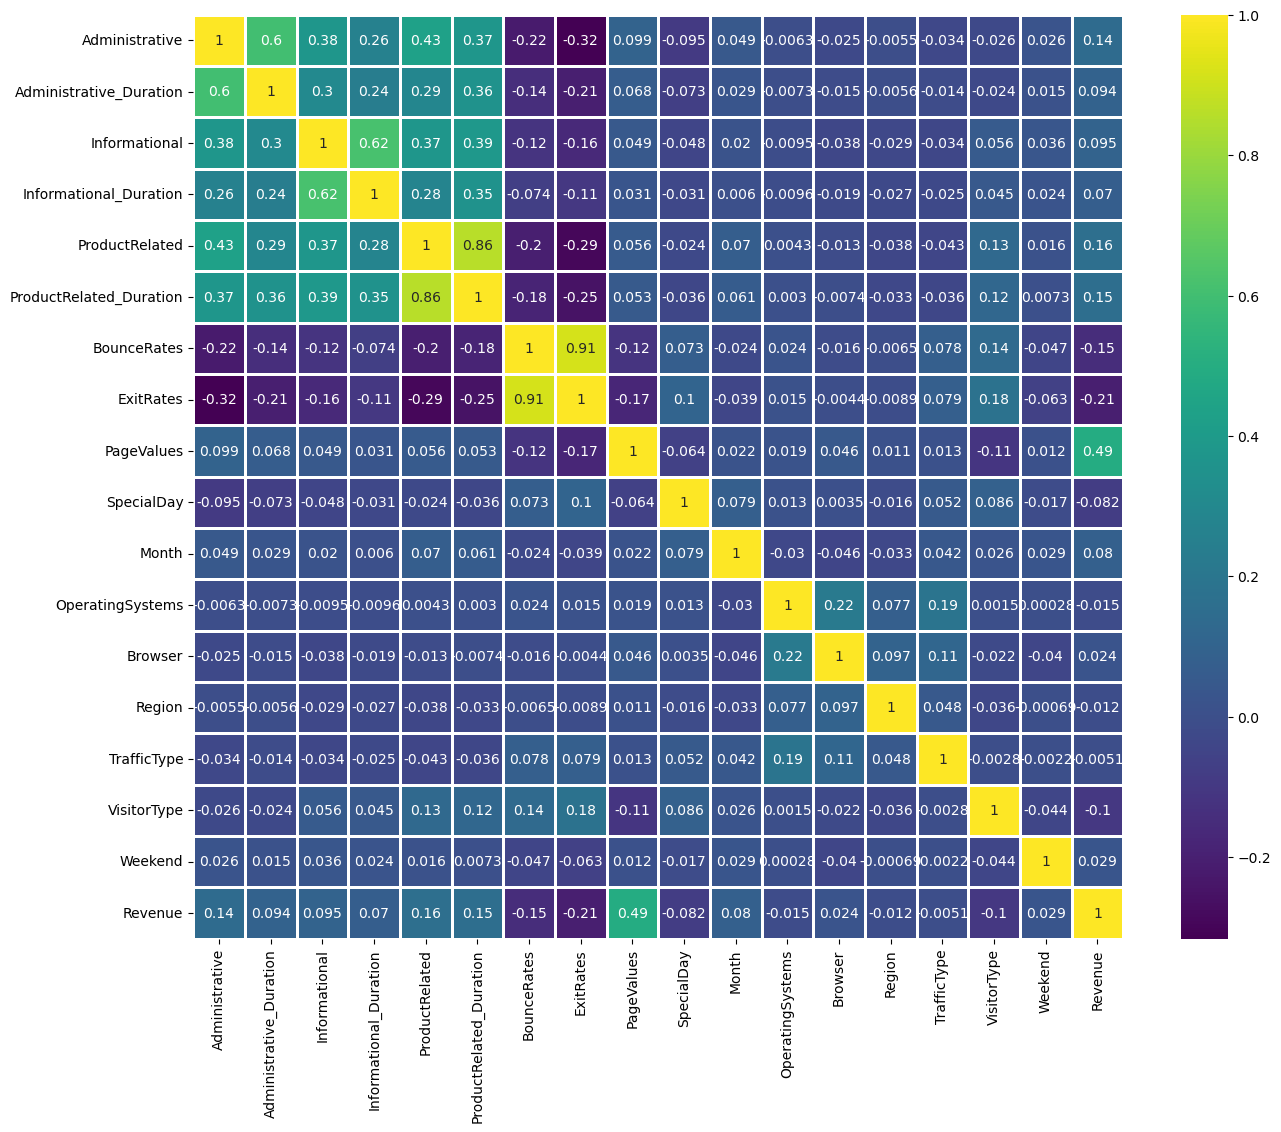

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot =True,cmap='viridis',linewidths=1)

In [12]:
# Checking VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('Revenue',axis = 1))

,features,VIF_Values
7,ExitRates,11.77
6,BounceRates,7.36
4,ProductRelated,6.67
15,VisitorType,6.23
5,ProductRelated_Duration,6.02
11,OperatingSystems,5.84
10,Month,4.63
12,Browser,2.99
0,Administrative,2.84
13,Region,2.59


In [28]:
# Splitting the dataset into features (X) and target (y) variables

X = df.drop(columns=['Revenue'])

y = df['Revenue']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_test

8916     0
772      1
12250    0
7793     0
6601     0
        ..
1046     0
6733     0
2404     0
5491     1
10773    0
Name: Revenue, Length: 3699, dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_score_LR = accuracy_score(y_test,y_pred)
accuracy_score_LR

0.8734793187347932

In [16]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test, y_pred_RF)

print(accuracy_score_RF)

0.894566098945661


In [17]:
RF.feature_importances_

array([0.04800915, 0.06218824, 0.01903235, 0.0301299 , 0.08381733,
       0.10262195, 0.07214944, 0.39419104, 0.00388369, 0.04754424,
       0.02009041, 0.0207509 , 0.03479247, 0.03506885, 0.01472766,
       0.01100238])

In [18]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

accuracy_score_DT = accuracy_score(y_test,y_pred_DT)
accuracy_score_DT

0.8580697485806975

In [21]:
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()

XGB.fit(X_train,y_train)

y_pred_XGB = XGB.predict(X_test)
accuracy_score_XGB = accuracy_score(y_pred_XGB,y_test)

accuracy_score_XGB

0.8918626655852934

In [22]:
from sklearn.model_selection import KFold, cross_val_score

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average CV Accuracy:", np.mean(scores))

Cross-validation scores: [0.89132198 0.90389294 0.91038118 0.90186537 0.90429846]
Average CV Accuracy: 0.9023519870235198
